# Investment Fund Statistics

In this notebook, I will use data available at https://data.ecb.europa.eu/data/datasets to visualize investment fund statistics in a similar way as  in the overview charts available at https://www.ecb.europa.eu/stats/financial_corporations/investment_funds/html/index.de.html.

Possibly also time series analysis on top

### Libraries

For the purposes of this task, the standard libraries of pandas and matplotlib are sufficient.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Preparing the data

In [88]:
inpath_assets_total = "data/assets_outstanding_amounts.csv"
inpath_debt_securities = "data/debt_securities.csv"
inpath_claims = "data/deposit_and_loan_claims.csv"
inpath_equity = "data/equity.csv"
inpath_ifmmf = "data/IFMMF_shares.csv"
inpath_nonfinancial = "data/nonfinancial_assets.csv"
inpath_remaining = "data/remaining_assets.csv"


df_assets_total = pd.read_csv(inpath_assets_total)
df_debt_securities = pd.read_csv(inpath_debt_securities)
df_claims = pd.read_csv(inpath_claims)
df_equity = pd.read_csv(inpath_equity)
df_ifmmf = pd.read_csv(inpath_ifmmf)
df_nonfinancial = pd.read_csv(inpath_nonfinancial)
df_remaining = pd.read_csv(inpath_remaining)

In [96]:
# To align with the ECB plot, we only look at data from 2015 onwards 
df_assets_total = df_assets_total.iloc[59:,:]
df_debt_securities = df_debt_securities.iloc[59:,:]
df_claims = df_claims.iloc[59:,:]
df_equity = df_equity.iloc[59:,:]
df_ifmmf = df_ifmmf.iloc[59:,:]
df_nonfinancial = df_nonfinancial.iloc[59:,:]
df_remaining = df_remaining.iloc[59:,:]

## Creating the Plot

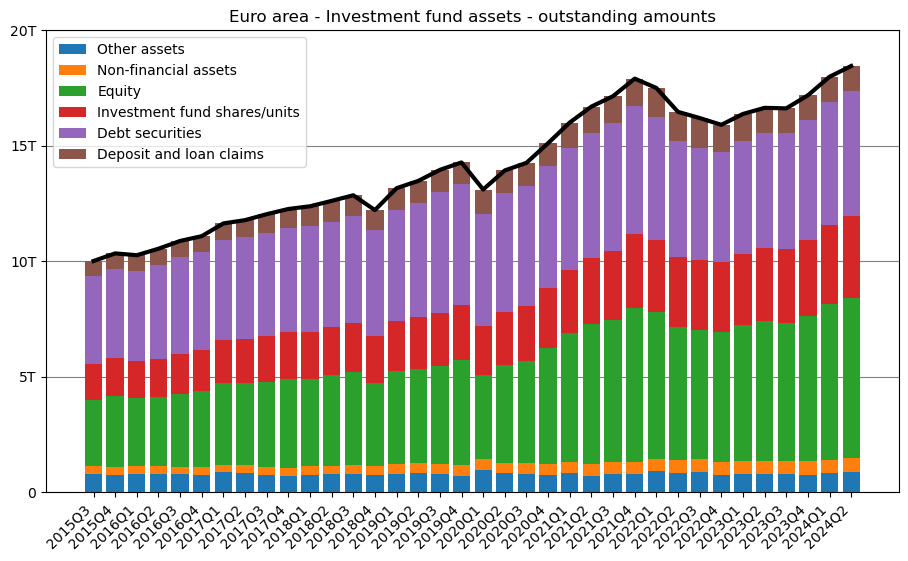

In [109]:
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(df_assets_total.iloc[:,1], df_assets_total.iloc[:,2], color='black', linewidth=3) # line

components = {
    "Other assets": df_remaining,
    "Non-financial assets": df_nonfinancial,
    "Equity": df_equity,
    "Investment fund shares/units": df_ifmmf,
    "Debt securities": df_debt_securities,
    "Deposit and loan claims" : df_claims
}

bottom = 0
for name,df in components.items():
    ax.bar(df.iloc[:,1], df.iloc[:,2], label=name, bottom=bottom)
    bottom += df.iloc[:,2]

# x axis labels
plt.xticks(rotation=45, ha='right') # rotate x axis labels

# y axis range and labels
plt.ylim([0, 20000000]) # set y axis range
ylabels = ['0', '5T', '10T', '15T', '20T']
ax.set_yticks([0, 5000000, 10000000, 15000000, 20000000])
ax.set_yticklabels(ylabels)

# background
ax.yaxis.grid(color='gray')
ax.set_axisbelow(True)

#legend
ax.set_title("Euro area - Investment fund assets - outstanding amounts")
ax.legend(loc="upper left")

plt.show()